In [2]:
import os
import sys

module_path = os.path.abspath(os.path.join('../../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

%load_ext autoreload
%autoreload 2

In [3]:
from experiments.pretraining_vs_finetuning.minibertas.miniberta_result_buckets import (
    roberta_1M, 
    roberta_10M,
    roberta_100M,
    roberta_1B,
    roberta_base
)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 250/250 [00:00<00:00, 32507.94it/s]


In [61]:
import numpy as np
import seaborn as sns
import matplotlib

def plot_isocurves(ax: matplotlib.axes.Axes):
    
    # plot the isocurves
    bernoullis = np.linspace(0, 1, 1000)
    total_variance = bernoullis * (1-bernoullis)
    
    pove_percentages = [i / 10 for i in range(10)]
    palette = sns.color_palette("flare", len(pove_percentages)) #crest
    
    for i, pove in enumerate(pove_percentages):
        min_pstay = 1 - 2*((1-pove)*total_variance) # 2 * UV, but max is when all variance is UV
        ax.plot(bernoullis, min_pstay, '--', alpha=0.3, color=palette[i])
        annotation_point = 800
        curve_text = f"{100 - int(100 * pove)}% PVAP" if pove > 0 else r"Min $P_C$"
        ax.annotate(
            curve_text, 
            (bernoullis[annotation_point], min_pstay[annotation_point]+ 0.008), 
            rotation=50, 
            horizontalalignment='center', 
            verticalalignment='center', 
            alpha=0.3, 
            color='black',
            fontsize=8
        )

Font 'rm' does not have a glyph for '\U0001faa3' [U+1faa3], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\U0001faa3' [U+1faa3], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\U0001faa3' [U+1faa3], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\U0001faa3' [U+1faa3], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\U0001faa3' [U+1faa3], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\U0001faa3' [U+1faa3], substituting with a dummy symbol.


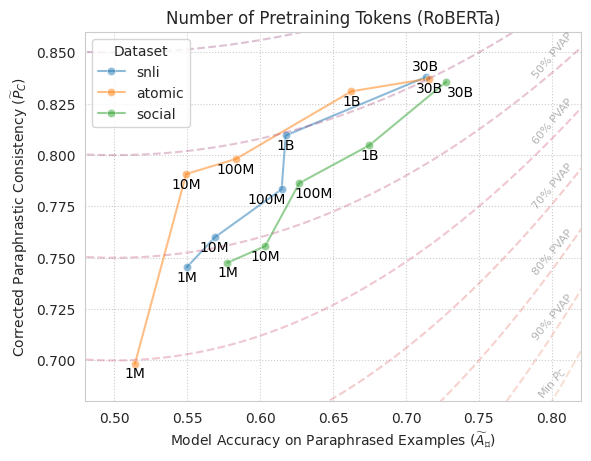

In [62]:
import seaborn as sns
sns.set_style("whitegrid", {'grid.linestyle': ':'})
import matplotlib.pyplot as plt


def plot_pretraining_trend(dataset):
    x = []
    y = []
    for size in [roberta_1M, roberta_10M, roberta_100M, roberta_1B, roberta_base]:
        summary = size[f'{dataset}-human'].linguistic_robustness_summary(size[f'{dataset}-test'])
        x.append(summary['paraphrase_accuracy_corrected']) #size['snli-test'].accuracy)
        y.append(summary['stay_prob_corrected'])
    
    sns.lineplot(x=x, y=y, marker='o', legend=True, label=dataset, alpha=0.5)
    for i, words in enumerate(['1M', '10M', '100M', '1B', '30B']):

        dataset_offsets = {
            'social': {'100M': [0.01, 0], '30B': [0.01, 0]},
            'snli': {'100M': [-0.01, 0], '30B': [0, 0.01]},
            'atomic': {},
        }

        x_offset = x_offset + dataset_offsets[dataset][words][0] if words in dataset_offsets[dataset].keys() else 0
        y_offset = y_offset + dataset_offsets[dataset][words][1] if words in dataset_offsets[dataset].keys() else -0.005
        
        
        plt.text(x[i] + x_offset, y[i]+y_offset, words, fontsize=10, ha='center', va='center', color='black')

plot_pretraining_trend('snli')
plot_pretraining_trend('atomic')
plot_pretraining_trend('social')

ax = plt.gca()
plot_isocurves(ax)
plt.xlabel("Model Accuracy on Paraphrased Examples ($\widetilde{A}_{🪣}$)")
plt.ylabel(r"Corrected Paraphrastic Consistency ($\widetilde{P}_C$)")

plt.legend(title='Dataset', loc='upper left')

plt.xlim(0.5 - 0.02, 0.8 + 0.02)  # set x-axis limits from -2 to 2
plt.ylim(0.7 - 0.02, 0.84 + 0.02)

plt.title(f'Number of Pretraining Tokens (RoBERTa)')
plt.savefig(f'pretraining.pdf')
plt.show()